### **Setup and Imports**

In [ ]:
# from google.colab import drive
# drive.mount("/content/drive")

In [ ]:
!git clone https://github.com/singhadityakumar1711/BERT_Vector_Generator.git

Cloning into 'BERT_Vector_Generator'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), done.


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

### **Data Encoding**

In [ ]:
DATA_PATH = '/content/BERT_Vector_Generator'
DATA_FILE = 'Samsung.csv'

In [ ]:
data = pd.read_csv(os.path.join(DATA_PATH, DATA_FILE))
data.head()

,Unnamed: 0,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [ ]:
data = data[:6000][:]
print(data.shape)

(6000, 7)


In [ ]:
data.describe()

,Unnamed: 0,Price,Rating,Review Votes
count,6000.000000,6000.000000,6000.000000,6000.000000
mean,2999.500000,195.767845,3.882500,1.388667
std,1732.195139,208.155848,1.471073,7.814481
min,0.000000,9.990000,1.000000,0.000000
25%,1499.750000,99.990000,3.000000,0.000000
50%,2999.500000,134.950000,5.000000,0.000000
75%,4499.250000,222.000000,5.000000,1.000000
max,5999.000000,2408.730000,5.000000,383.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


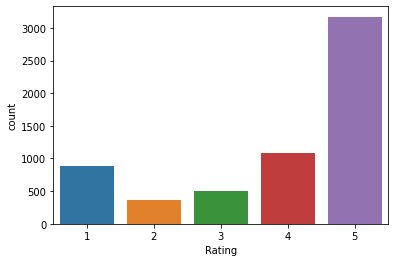

In [ ]:
sns.countplot(data.Rating)

In [ ]:
# Reviews with HTML Tag formats
i=0;
for sent in data['Reviews'].values:
    if (len(re.findall("<(\"[^\"]*\"|'[^']*'|[^'\">])*>", sent))):
        print(i)
        print(sent)
        print('--------------')
    i += 1;

4480
After less than 1 month of using this phone, we experienced texting issues - essentially texts wouldn't send & we'd get a failure message. A call to T Mobile customer service had us going through all kinds of hoops trying to diagnose the issue & finally the CS just told us to switch our SIM card. We did & the phone worked well for about 1 week. We are now back to texting issues & unable to receive/make phone call issues where we have to power down the phone, wait & power it up again.However, upon looking at the message boards on the T Mobile website, I learned that other people have this same issue & T Mobile has acknowledged the issue, but has not resolved it.<<This is a known issue with this device. Putting the phone on GSM only, as mike_s stated, is a workaround. We ask that you please be patient with us as we work with Samsung to come up with a resolution.>>The T Mobile workaround:I have found a few things that can help you text in the meantime. First, I'd look to uninstall an

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
# print(set(stopwords.words('english')))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def cleanhtml(sentence):    #function to clean the reviews with any html-tags
    cleanr = re.compile("<(\"[^\"]*\"|'[^']*'|[^'\">])*>")
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext

In [ ]:
def cleanpunc(sentence):  #function to clean the reviews of any punctuation or special characters
    cleaned = re.sub(r'[\|#]',r'',sentence) #removed '? ! ' " '
    cleaned = re.sub(r'[)|(|\|/|:|-|@|$|%|^|&|*]',r' ',cleaned)   #removed ". , ;"
    return  cleaned

In [ ]:
filtered = []
for rev in data['Reviews'].values:
  clean = cleanhtml(rev)
  clean = cleanpunc(clean)
  filtered.append(clean)

In [ ]:
data['Cleaned_Reviews'] = filtered
data_npr = data

In [ ]:
data.shape, data_npr.shape

((6000, 8), (6000, 8))

In [ ]:
data_npr.head()

,Unnamed: 0,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Cleaned_Reviews
0,0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,I feel so LUCKY to have found this used phone...
1,1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,"nice phone, nice up grade from my pantach revu..."
2,2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,Very pleased
3,3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,It works good but it goes slow sometimes but i...
4,4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,Great phone to replace my lost phone. The only...


In [ ]:
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# def remove_stopwords(sentence):
#   sentence = sentence.lower()
#   word_tokens = word_tokenize(sentence)
#   stop_words = set(stopwords.words('english'))
#   filtered_sentence = []
#   for w in word_tokens:
#     if w not in stop_words:
#         filtered_sentence.append(w)
#   return filtered_sentence

In [ ]:
# data['tokenized_reviews'] = data['Cleaned_Reviews'].apply(lambda x: remove_stopwords(x))

In [ ]:
# data.head()

In [ ]:
# from nltk.stem.snowball import SnowballStemmer
# snow_stemmer = SnowballStemmer(language='english')
# def stemming(str_list):
#   stem_words = []
#   for w in str_list:
#     x = snow_stemmer.stem(w)
#     stem_words.append(x)
#   return stem_words

In [ ]:
# data['token_stem_reviews'] = data['tokenized_reviews'].apply(lambda x: stemming(x))

In [ ]:
# data.head()

In [ ]:
data.shape, data_npr.shape

((6000, 8), (6000, 8))

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 5.3 MB/s 
     |████████████████████████████████| 6.6 MB 38.7 MB/s 
     |████████████████████████████████| 596 kB 50.4 MB/s 
     |████████████████████████████████| 101 kB 10.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import torch
from transformers import BertTokenizer, BertModel

In [ ]:
import logging
logging.basicConfig(level=logging.INFO)

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
str = data_npr.Cleaned_Reviews[0]
str

"I feel so LUCKY to have found this used  phone to us   not used hard at all , phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it   your honesty re  said used phone.I recommend this seller very highly   would but from them again!!"

In [ ]:
str1 = "[CLS] "
for x in str:
  if x is '.':
    str1 = str1 + ". [SEP] "
  else:
    str1 = str1 + x

str = str1 + " [SEP]"

In [ ]:
str

"[CLS] I feel so LUCKY to have found this used  phone to us   not used hard at all , phone on line from someone who upgraded and sold this one. [SEP]  My Son liked his old one that finally fell apart after 2. [SEP] 5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it   your honesty re  said used phone. [SEP] I recommend this seller very highly   would but from them again!! [SEP]"

In [ ]:
tokenized_text = tokenizer.tokenize(str)
print (tokenized_text)

['[CLS]', 'i', 'feel', 'so', 'lucky', 'to', 'have', 'found', 'this', 'used', 'phone', 'to', 'us', 'not', 'used', 'hard', 'at', 'all', ',', 'phone', 'on', 'line', 'from', 'someone', 'who', 'upgraded', 'and', 'sold', 'this', 'one', '.', '[SEP]', 'my', 'son', 'liked', 'his', 'old', 'one', 'that', 'finally', 'fell', 'apart', 'after', '2', '.', '[SEP]', '5', '+', 'years', 'and', 'didn', "'", 't', 'want', 'an', 'upgrade', '!', '!', 'thank', 'you', 'seller', ',', 'we', 'really', 'appreciate', 'it', 'your', 'honesty', 're', 'said', 'used', 'phone', '.', '[SEP]', 'i', 'recommend', 'this', 'seller', 'very', 'highly', 'would', 'but', 'from', 'them', 'again', '!', '!', '[SEP]']


In [ ]:
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

In [ ]:
for tup in zip(tokenized_text, indexed_tokens):
    print('{:<12} {:>6,}'.format(tup[0], tup[1]))

[CLS]           101
i             1,045
feel          2,514
so            2,061
lucky         5,341
to            2,000
have          2,031
found         2,179
this          2,023
used          2,109
phone         3,042
to            2,000
us            2,149
not           2,025
used          2,109
hard          2,524
at            2,012
all           2,035
,             1,010
phone         3,042
on            2,006
line          2,240
from          2,013
someone       2,619
who           2,040
upgraded      9,725
and           1,998
sold          2,853
this          2,023
one           2,028
.             1,012
[SEP]           102
my            2,026
son           2,365
liked         4,669
his           2,010
old           2,214
one           2,028
that          2,008
finally       2,633
fell          3,062
apart         4,237
after         2,044
2             1,016
.             1,012
[SEP]           102
5             1,019
+             1,009
years         2,086
and           1,998


In [ ]:
c = 0
segments_ids = []
for x in tokenized_text:
  if x != '[SEP]':
    segments_ids.append(c)
  else:
    segments_ids.append(c)
    c+=1

In [ ]:
print(segments_ids)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [ ]:
tokens_tensor = torch.tensor([indexed_tokens])
segments_tensors = torch.tensor([segments_ids])

In [ ]:
segments_tensors

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]])

In [ ]:
model = BertModel.from_pretrained('bert-base-uncased',
                                  output_hidden_states = True) # Whether the model returns all hidden-states.

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

In [ ]:
with torch.no_grad():

    outputs = model(tokens_tensor, segments_tensors)

    # Evaluating the model will return a different number of objects based on 
    # how it's  configured in the `from_pretrained` call earlier. In this case, 
    # becase we set `output_hidden_states = True`, the third item will be the 
    # hidden states from all layers. See the documentation for more details:
    # https://huggingface.co/transformers/model_doc/bert.html#bertmodel
    hidden_states = outputs[2]

In [ ]:
print ("Number of layers:", len(hidden_states), "  (initial embeddings + 12 BERT layers)")
layer_i = 0

print ("Number of batches:", len(hidden_states[layer_i]))
batch_i = 0

print ("Number of tokens:", len(hidden_states[layer_i][batch_i]))
token_i = 0

print ("Number of hidden units:", len(hidden_states[layer_i][batch_i][token_i]))

Number of layers: 13   (initial embeddings + 12 BERT layers)
Number of batches: 1
Number of tokens: 88
Number of hidden units: 768


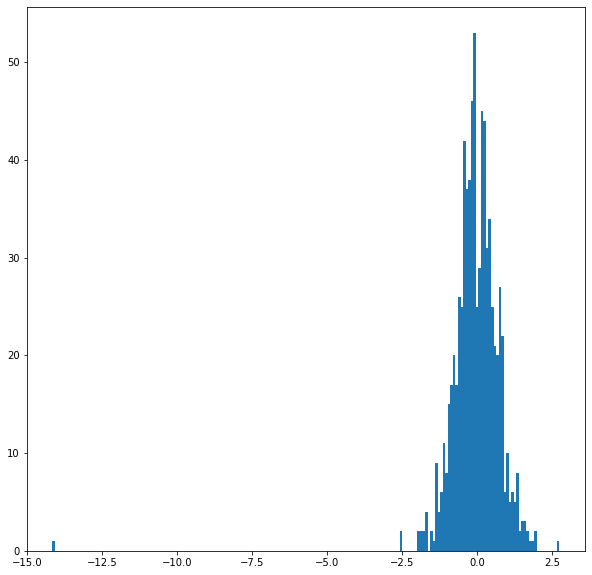

In [ ]:
# For the 10th token in our sentence, select its feature values from layer 10.
token_i = 10
layer_i = 10
vec = hidden_states[layer_i][batch_i][token_i]

# Plot the values as a histogram to show their distribution.
plt.figure(figsize=(10,10))
plt.hist(vec, bins=200)
plt.show()

In [ ]:
token_embeddings = torch.stack(hidden_states, dim=0)
token_embeddings.size()

torch.Size([13, 1, 88, 768])

In [ ]:
# Remove dimension 1, the "batches".
token_embeddings = torch.squeeze(token_embeddings, dim=1)
token_embeddings.size()

torch.Size([13, 88, 768])

In [ ]:
# Swap dimensions 0 and 1.
token_embeddings = token_embeddings.permute(1,0,2)
token_embeddings.size()

torch.Size([88, 13, 768])

In [ ]:
# Stores the token vectors, with shape [22 x 768]
token_vecs_sum = []

# `token_embeddings` is a [22 x 12 x 768] tensor.

# For each token in the sentence...
for token in token_embeddings:

    # `token` is a [12 x 768] tensor

    # Sum the vectors from the last four layers.
    sum_vec = torch.sum(token[-4:], dim=0)
    
    # Use `sum_vec` to represent `token`.
    token_vecs_sum.append(sum_vec)

print ('Shape is: %d x %d' % (len(token_vecs_sum), len(token_vecs_sum[0])))

Shape is: 88 x 768


In [ ]:
for i, token_str in enumerate(tokenized_text):
  print (i, token_str)

0 [CLS]
1 i
2 feel
3 so
4 lucky
5 to
6 have
7 found
8 this
9 used
10 phone
11 to
12 us
13 not
14 used
15 hard
16 at
17 all
18 ,
19 phone
20 on
21 line
22 from
23 someone
24 who
25 upgraded
26 and
27 sold
28 this
29 one
30 .
31 [SEP]
32 my
33 son
34 liked
35 his
36 old
37 one
38 that
39 finally
40 fell
41 apart
42 after
43 2
44 .
45 [SEP]
46 5
47 +
48 years
49 and
50 didn
51 '
52 t
53 want
54 an
55 upgrade
56 !
57 !
58 thank
59 you
60 seller
61 ,
62 we
63 really
64 appreciate
65 it
66 your
67 honesty
68 re
69 said
70 used
71 phone
72 .
73 [SEP]
74 i
75 recommend
76 this
77 seller
78 very
79 highly
80 would
81 but
82 from
83 them
84 again
85 !
86 !
87 [SEP]


In [ ]:
print("Phone @ 10   ", token_vecs_sum[10][:5])
print("Phone @ 71  ", token_vecs_sum[71][:5])

Phone @ 10    tensor([ 0.3840,  1.0849,  0.6187, -2.6810, -1.6450])
Phone @ 71   tensor([ 4.9903,  3.1088,  4.0439, -2.2912,  1.0994])


In [ ]:
from scipy.spatial.distance import cosine
phone_simi = 1 - cosine(token_vecs_sum[10], token_vecs_sum[71])
print(phone_simi)

0.8407026529312134


In [ ]:
print(data_npr.shape)

(6000, 8)


In [ ]:
k = 0
for str in data_npr['Cleaned_Reviews'].values:
  str1 = "[CLS] "
  for x in str:
    if x is '.':
      str1 = str1 + ". [SEP] "
    else:
      str1 = str1 + x
  str = str1 + " [SEP]"

  tokenized_text = tokenizer.tokenize(str)
  if(len(tokenized_text) > 500):
    data_npr.drop(k, inplace = True)
  k+=1

In [ ]:
print(data_npr.shape)

(5886, 8)


In [ ]:
def bert_func(str):
  str1 = "[CLS] "
  for x in str:
    if x is '.':
      str1 = str1 + ". [SEP] "
    else:
      str1 = str1 + x
  str = str1 + " [SEP]"

  tokenized_text = tokenizer.tokenize(str)
  indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
  
  c = 0
  segments_ids = []
  for x in tokenized_text:
    if x != '[SEP]':
      segments_ids.append(c)
    else:
      segments_ids.append(c)
      c+=1

  tokens_tensor = torch.tensor([indexed_tokens])
  segments_tensors = torch.tensor([segments_ids])

  with torch.no_grad():
    outputs = model(tokens_tensor, segments_tensors)
    hidden_states = outputs[2]

  token_embeddings = torch.stack(hidden_states, dim=0)
  token_embeddings = torch.squeeze(token_embeddings, dim=1)
  token_embeddings = token_embeddings.permute(1,0,2)

  token_vecs_sum = []
  for token in token_embeddings:
    # `token` is a [12 x 768] tensor

    # Sum the vectors from the last four layers.
    sum_vec = torch.sum(token[-4:], dim=0)
    
    # Use `sum_vec` to represent `token`.
    token_vecs_sum.append(sum_vec)
  
  return token_vecs_sum

In [ ]:
# data_npr['BERT Tensors'] = data_npr['Cleaned_Reviews'].apply(lambda x: bert_func(x))

In [ ]:
# len(data_npr['BERT Tensors'][0])

In [ ]:
data_npr.shape

(5886, 8)

In [ ]:
data_npr.head()

,Unnamed: 0,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Cleaned_Reviews
0,0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,I feel so LUCKY to have found this used phone...
1,1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,"nice phone, nice up grade from my pantach revu..."
2,2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,Very pleased
3,3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,It works good but it goes slow sometimes but i...
4,4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,Great phone to replace my lost phone. The only...


In [ ]:
def bert_func_sent(str):
  str1 = "[CLS] "
  for x in str:
    if x is '.':
      str1 = str1 + ". [SEP] "
    else:
      str1 = str1 + x
  str = str1 + " [SEP]"

  tokenized_text = tokenizer.tokenize(str)
  indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
  
  c = 0
  segments_ids = []
  for x in tokenized_text:
    if x != '[SEP]':
      segments_ids.append(c)
    else:
      segments_ids.append(c)
      c+=1

  tokens_tensor = torch.tensor([indexed_tokens])
  segments_tensors = torch.tensor([segments_ids])

  with torch.no_grad():
    outputs = model(tokens_tensor, segments_tensors)
    hidden_states = outputs[2]

  token_embeddings = torch.stack(hidden_states, dim=0)
  token_embeddings = torch.squeeze(token_embeddings, dim=1)
  token_embeddings = token_embeddings.permute(1,0,2)

  # `encoded_layers` has shape [12 x 1 x 22 x 768]

  # `token_vecs` is a tensor with shape [22 x 768]
  token_vecs = hidden_states[11][0]

  # Calculate the average of all 22 token vectors.
  sentence_embedding = torch.mean(token_vecs, dim=0)
  
  return sentence_embedding

In [ ]:
data_npr['Sentence BERT Tensors'] = data_npr['Cleaned_Reviews'].apply(lambda x: bert_func_sent(x))

In [ ]:
len(data_npr['Sentence BERT Tensors'][1000])

768

In [ ]:
print(type(data_npr['Sentence BERT Tensors'][0][0].tolist()))

<class 'float'>


In [ ]:
def bert_list(tensors):
  vec_list = []
  for tensor in tensors:
    x = tensor.tolist()
    vec_list.append(x)

  return vec_list

In [ ]:
data_npr['Sentence BERT List'] = data_npr['Sentence BERT Tensors'].apply(lambda x: bert_list(x))

In [ ]:
# def bert_numpy(my_list):
#   return np.array(my_list)

# data_npr['Sentence BERT List'] = data_npr['Sentence BERT List'].apply(lambda x: bert_numpy(x))

In [ ]:
data_npr.head()

,Unnamed: 0,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Cleaned_Reviews,Sentence BERT Tensors,Sentence BERT List
0,0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,I feel so LUCKY to have found this used phone...,"[tensor(-0.0417), tensor(0.6073), tensor(0.511...","[-0.041668638586997986, 0.60731440782547, 0.51..."
1,1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,"nice phone, nice up grade from my pantach revu...","[tensor(-0.5666), tensor(-0.0139), tensor(0.33...","[-0.5665884613990784, -0.013932605274021626, 0..."
2,2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,Very pleased,"[tensor(-0.0086), tensor(0.0189), tensor(0.218...","[-0.00858563557267189, 0.018934210762381554, 0..."
3,3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,It works good but it goes slow sometimes but i...,"[tensor(-0.2030), tensor(-0.0727), tensor(0.73...","[-0.20296059548854828, -0.07265272736549377, 0..."
4,4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,Great phone to replace my lost phone. The only...,"[tensor(0.2446), tensor(0.7344), tensor(0.1970...","[0.2445627897977829, 0.7343928217887878, 0.197..."


In [ ]:
my_list = []
for li in data_npr['Sentence BERT List']:
  my_list.append(li)

In [ ]:
my_arr = np.array(my_list)

In [ ]:
print(my_arr)

[[-0.04166864  0.60731441  0.51149487 ... -0.28787288 -0.1186085
  -0.48805383]
 [-0.56658846 -0.01393261  0.33491242 ... -0.12025427 -0.34372705
  -0.07717379]
 [-0.00858564  0.01893421  0.21854259 ... -0.34817389 -0.10928269
  -0.14236918]
 ...
 [ 0.03142054 -0.23408052  0.58919549 ... -0.84752285 -0.09045932
  -0.44634339]
 [-0.75144678  0.30751377  0.05148806 ...  0.28381988 -0.22861688
  -0.02918474]
 [-0.15301096 -0.11313329 -0.3212561  ... -0.54568976 -0.12092319
  -0.10832257]]


In [ ]:
from scipy.io import savemat
workspace_dict = {'encoded_data': my_arr}
savemat(os.path.join('BERT_Vector_Generator', 'workspace.mat'), workspace_dict)


### **Manifold Learning and Embedding**

#### **Preparation**

In [ ]:
directory_path = 'BERT_Vector_Generator'
workspace_file = 'workspace.mat'


In [ ]:
from scipy.io import loadmat
workspace = loadmat(os.path.join(directory_path, workspace_file))

In [ ]:
print(workspace.keys())

dict_keys(['__header__', '__version__', '__globals__', 'encoded_data', 'embedded_data'])


In [ ]:
data = workspace['encoded_data']
print(data.shape)

(5886, 768)


In [ ]:
DATA_PATH = '/content/BERT_Vector_Generator'
DATA_FILE = 'Samsung.csv'

In [ ]:
frame = pd.read_csv(os.path.join(DATA_PATH, DATA_FILE))
frame.head()

,Unnamed: 0,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [ ]:
!pip install openTSNE

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### **Custom TSNE**

In [ ]:
import openTSNE
from openTSNE import TSNEEmbedding
from openTSNE import affinity
from openTSNE import initialization

import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [ ]:
x_train = data.copy()

In [ ]:
affinities_train = affinity.PerplexityBasedNN(
    x_train,
    perplexity=200,
    metric="euclidean",
    n_jobs=8,
    random_state=42,
    verbose=True,
    k_neighbors = 500
)

===> Finding 500 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 16.72 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 2.00 seconds


In [ ]:
init_train_pca = initialization.pca(x_train, random_state=42)


In [ ]:
from openTSNE import utils
from sklearn.manifold import SpectralEmbedding
from openTSNE.initialization import rescale

def le(X, n_components=2, eig_solver="auto", random_state=None, verbose=False):
    timer = utils.Timer("Calculating Laplacian Eigenmaps-based initialization...", verbose)
    timer.__enter__()

    le_ = SpectralEmbedding(n_components = n_components,
                            random_state = random_state,
                            n_neighbors = 100)
    embedding = le_.fit_transform(X)
    rescale(embedding, inplace=True)

    timer.__exit__()

    return np.ascontiguousarray(embedding)

In [ ]:
init_train_spectral = le(x_train, random_state = 42)

In [ ]:
embedding_train = TSNEEmbedding(
    init_train_spectral,
    affinities_train,
    negative_gradient_method="bh",
    n_jobs=8,
    verbose=True
)

In [ ]:
embedding_train_1 = embedding_train.optimize(n_iter=2000, exaggeration=1, momentum=0.9)
print("Shape of embedding train: {}".format(embedding_train.shape))

===> Running optimization with exaggeration=1.00, lr=490.50 for 2000 iterations...
Iteration   50, KL divergence 1.1015, 50 iterations in 5.1363 sec
Iteration  100, KL divergence 0.9633, 50 iterations in 6.1006 sec
Iteration  150, KL divergence 0.9219, 50 iterations in 5.3854 sec
Iteration  200, KL divergence 0.8979, 50 iterations in 4.8360 sec
Iteration  250, KL divergence 0.8837, 50 iterations in 5.1517 sec
Iteration  300, KL divergence 0.8763, 50 iterations in 5.4793 sec
Iteration  350, KL divergence 0.8716, 50 iterations in 5.0446 sec
Iteration  400, KL divergence 0.8658, 50 iterations in 5.1763 sec
Iteration  450, KL divergence 0.8634, 50 iterations in 5.0663 sec
Iteration  500, KL divergence 0.8594, 50 iterations in 5.0779 sec
Iteration  550, KL divergence 0.8572, 50 iterations in 4.8364 sec
Iteration  600, KL divergence 0.8543, 50 iterations in 5.0156 sec
Iteration  650, KL divergence 0.8519, 50 iterations in 4.7654 sec
Iteration  700, KL divergence 0.8509, 50 iterations in 4.71

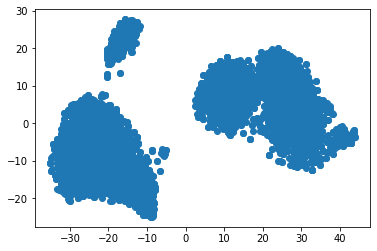

In [ ]:
plt.scatter(embedding_train_1.T[0], embedding_train_1.T[1])

In [ ]:
from scipy.io import savemat
workspace_dict = {'encoded_data': my_arr,
                  'embedded_data': embedding_train_1}
savemat(os.path.join('BERT_Vector_Generator', 'workspace.mat'), workspace_dict)


#### **Basic TSNE**

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x_train)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5886 samples in 0.005s...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 5886 samples in 1.863s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5886
[t-SNE] Computed conditional probabilities for sample 2000 / 5886
[t-SNE] Computed conditional probabilities for sample 3000 / 5886
[t-SNE] Computed conditional probabilities for sample 4000 / 5886
[t-SNE] Computed conditional probabilities for sample 5000 / 5886
[t-SNE] Computed conditional probabilities for sample 5886 / 5886
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.375793
[t-SNE] KL divergence after 1000 iterations: 1.360347


[Text(0.5, 1.0, 'SAMSUNG Reviews T-SNE projection')]

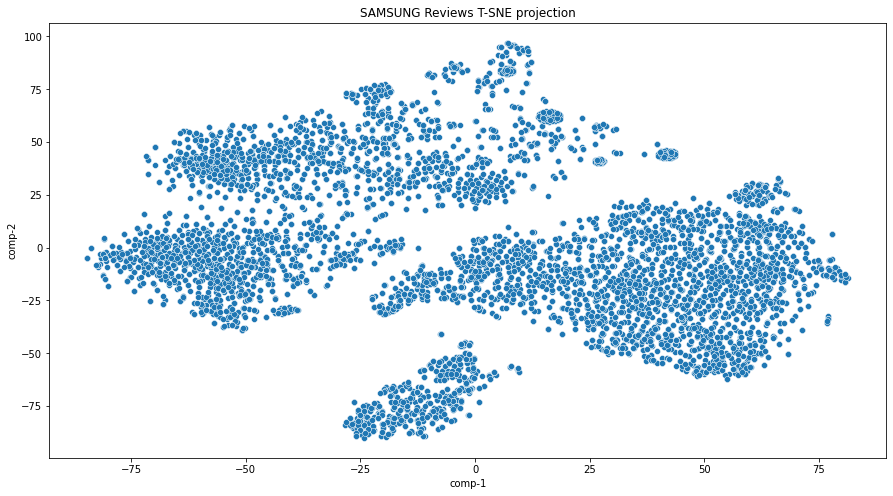

In [ ]:
df = pd.DataFrame()
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
plt.figure(figsize = (15,8))
sns.scatterplot(x="comp-1", y="comp-2", palette=sns.color_palette("hls", 30), data=df).set(title="SAMSUNG Reviews T-SNE projection")

### **Clustering**

#### **Preparation**

In [ ]:
directory_path = 'BERT_Vector_Generator'
workspace_file = 'workspace.mat'


In [ ]:
from scipy.io import loadmat
workspace = loadmat(os.path.join(directory_path, workspace_file))

In [ ]:
print(workspace.keys())

dict_keys(['__header__', '__version__', '__globals__', 'encoded_data', 'embedded_data'])


In [ ]:
data = workspace['encoded_data']
embedded = workspace['embedded_data']
print(data.shape)

(5886, 768)


In [ ]:
DATA_PATH = '/content/BERT_Vector_Generator'
DATA_FILE = 'Samsung.csv'

In [ ]:
frame = pd.read_csv(os.path.join(DATA_PATH, DATA_FILE))
frame.head()

,Unnamed: 0,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


#### **Cluster Application**

##### **DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=3, min_samples=2).fit(embedded)

In [ ]:
clustering.labels_

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.preprocessing import StandardScaler
def dbscan(X, eps, min_samples):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")

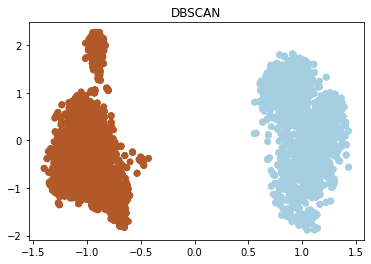

In [ ]:
dbscan(embedded, eps = 0.5, min_samples = 5)

##### **KMeans**

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics


def kmeans(X, n_clusters):
    kmeans_cluster_train = KMeans(n_clusters = n_clusters, random_state = 2002)
    cluster_res_ = kmeans_cluster_train.fit(embedded)
    labels_true = cluster_res_.labels_
    cluster_center = cluster_res_.cluster_centers_
    print("______________________________________________________________________________________________")
    print("Silhoutte Index: {}".format(metrics.silhouette_score(embedded, labels_true)))
    print("Davies Bouldin Score: {}".format(metrics.davies_bouldin_score(embedded, labels_true)))
    
    plt.scatter(X[:,0], X[:,1],c=labels_true, cmap='Paired')
    plt.title("K-means")

______________________________________________________________________________________________
Silhoutte Index: 0.6154439798093556
Davies Bouldin Score: 0.6258177137918376


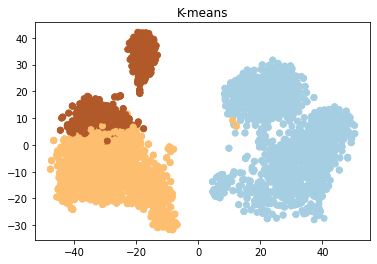

In [ ]:
kmeans(embedding_train_1, n_clusters = 3)

##### **Agglomerative Clustering**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
def hier(X, n_clusters):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    hier = AgglomerativeClustering(n_clusters=n_clusters)
    y_pred = hier.fit_predict(X)
    print("______________________________________________________________________________________________")
    print("Silhoutte Index: {}".format(metrics.silhouette_score(embedded, y_pred)))
    print("Davies Bouldin Score: {}".format(metrics.davies_bouldin_score(embedded, y_pred)))
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("Hierarchical")

______________________________________________________________________________________________
Silhoutte Index: 0.6052503083594007
Davies Bouldin Score: 0.6607811502121929


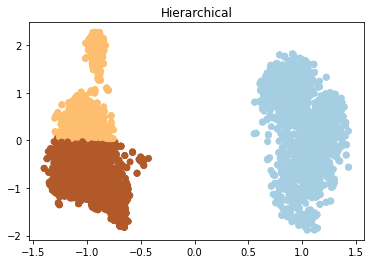

In [ ]:
hier(embedded, n_clusters = 3)

##### **Fuzzy C Means**

In [ ]:
!pip install fuzzy-c-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: typer
    Found existing installation: typer 0.4.1
    Uninstalling typer-0.4.1:
      Successfully uninstalled typer-0.4.1


In [ ]:
X = embedding_train_1.copy()

In [ ]:
from fcmeans import FCM

In [ ]:
fcm = FCM(n_clusters=3)
fcm.fit(X)

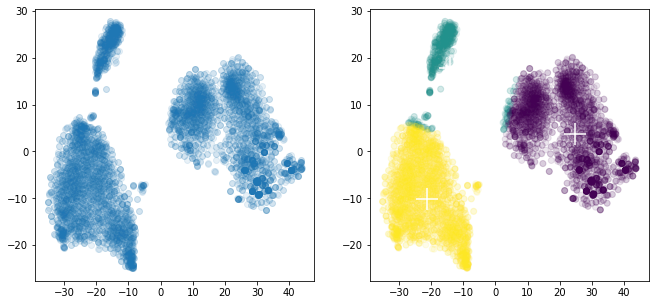

In [ ]:
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X)

# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(X[:,0], X[:,1], alpha=.1)
axes[1].scatter(X[:,0], X[:,1], c=fcm_labels, alpha=.1)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='w')
plt.show()

In [ ]:
from scipy.io import savemat
workspace_dict = {'encoded_data': my_arr,
                  'embedded_data': embedding_train_1,
                  'labels': fcm_labels}
savemat(os.path.join('BERT_Vector_Generator', 'workspace.mat'), workspace_dict)


#### **Further Approches**

In [283]:
fcm_labels.

array([0, 0, 0, ..., 0, 2, 0])